User reviews play a significant role in guiding customers' purchasing decisions and providing manufacturers with feedback on their products.

In this project, we will conduct sentiment analysis on [Amazon product reviews](https://www.kaggle.com/datasets/furkannakdagg/amazon-reviews) using NLP techniques. The analysis will help understand customer sentiment towards a particular product based on their reviews.

The dataset used in this project includes Amazon product reviews, which will provide a thorough understanding of the sentiment analysis process and its application.

1. Importing Libraries and Checking Data 

In [ ]:
import pandas as pd
import numpy as np

# Plot library 📊
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objs as go

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Metrics 📐
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models 🤖
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Removing Warnings and Better Observation 🔧
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Bussines Problem**
--------------------

The aim of the company is to increase its sales by analyzing customer feedback on Kozmos products, which includes home textiles and daily wear. The company intends to improve its product features based on customer complaints by performing sentiment analysis on the comments received.

The comments will be labeled through sentiment analysis, and a classification model will be created using the labeled data to achieve this goal.

**Dataset Story**
-----------------

> The dataset consists of customer comments for a specific product group and includes the following information:
- Title of the Comment
- Number of Stars Given
- Variables indicating the number of people who found the Comment helpful.

-   **Total Features : 4**
-   **Total Row : 5611**
-   **CSV File Size : 489 KB**

| Sr. | Feature | Description |
| --- | --- | --- |
| 1 | Star | Number of stars given to the product |
| 2 | Helpful | Number of people who found the comment helpful |
| 3 | Title | Title given to comment content, short comment |
| 4 | Review | Review of the product |


---

In [ ]:
df = pd.read_excel("amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [ ]:
df.isnull().sum()

Star        0
HelpFul     0
Title      52
Review     18
dtype: int64

**Drop the missing values without deep analysis for process.**

In [ ]:
df.dropna(subset=['Review'], inplace=True)
df.isnull().sum()

Star        0
HelpFul     0
Title      43
Review      0
dtype: int64

---

# 2\. Text Preprocessing 📝

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Normalizing Case Folding</span>

In the dataset, some letters are in uppercase while others are in lowercase. This mix of upper and lowercase letters can be problematic because the same word might appear as uppercase at the beginning of a sentence and as lowercase in the middle of the sentence. This can lead to a measurement problem when creating word vectors and representing words because the same words would be treated as different, resulting in a lack of frequency enrichment.

In [ ]:
df['Review'] = df['Review'].str.lower()

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Punctuation</span>

Similar to upper and lowercase letters, punctuation marks lack measurement value. For instance, in a classification example, if there are two reviews, one with a larger number of punctuation marks, it's not expected to find any patterns from the punctuation marks.

In [ ]:
# replace punctions with spaces
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Numbers</span>

It's important to note that the business problem may have specific requirements regarding the handling of numbers. For instance, the amount of numbers in a text could be important. In this case, removing numbers would not be an appropriate solution. However, in the current example, numbers are removed because they do not provide distinctive information.

In [ ]:
df['Review'] = df['Review'].str.replace('\d', '')  

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Stopwords and Rarewords</span>

In [ ]:
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# removing stopwords
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [ ]:
# removing words with less than 2 frequency
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()
temp_df
drops = temp_df[temp_df <= 1]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

---

Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# 3. Visualization 

For exploratory data analysis, we'll create some visualizations to gain a deeper understanding of the data. These visualizations are not meant for modeling but rather for observing and getting to know the data better. To determine term frequencies, we can use bar plots, word clouds, or other visualization techniques that can be used for categorical features by converting them into numerical values.

In [ ]:
# create a df of the frequency of the words
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]  
tf.sort_values("tf", ascending=False)
tf.head()

,words,tf
0,happy,196.00
1,good,535.00
2,quality,889.00
3,material,565.00
4,however,78.00


---

Bar Plot

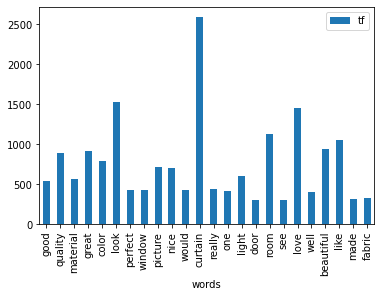

In [ ]:
tf[tf["tf"] > 300].plot.bar(x="words", y="tf")
plt.show()

<div class="alert alert-success alert-info">
       <b> 📌 This analysis allows us to make educated guesses about the type of product based on the words present in the reviews. For example, upon examining the words such as "curtain", "room", "window", it seems like the product under consideration is likely to be a textile product, possibly curtains. </b>
</div>
<br>

<sub><sup>In the data, we have the star ratings assigned to the product. By examining the comments from reviews with less than 3 stars, we can identify the issues and work on resolving them in production. On the other hand, looking at comments from reviews with higher than 3 stars can highlight the strengths of the product. By repeating this process for multiple products, we can understand which topics tend to receive the most positive or negative feedback.

---

Word Cloud

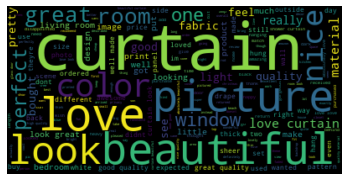

In [ ]:
text = " ".join(i for i in df.Review) 
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

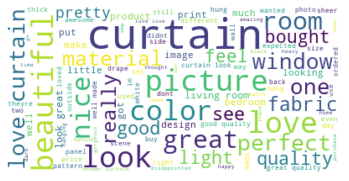

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

---

Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"]) 
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

Feature Engineering

In [ ]:
#@title Testing

# testing the approach
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
rev_pol = pd.concat([df["Review"][0:10], df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")], axis=1)
rev_pol.columns = ["Review", "Polarity Scores"]
rev_pol

In [ ]:
# assign polarity scores (value > 0 => positive)
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"].value_counts()

pos    4764
neg     829
Name: sentiment_label, dtype: int64

In [ ]:
df.groupby("sentiment_label")["Star"].mean()

sentiment_label
neg   3.40
pos   4.58
Name: Star, dtype: float64

In [ ]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
y = df["sentiment_label"]
X = df["Review"]
print(" X ".center(50, "~"))
display(X.head())
print("")
print(" Y ".center(50, "~"))
display(y.head())

~~~~~~~~~~~~~~~~~~~~~~~ X ~~~~~~~~~~~~~~~~~~~~~~~~


0                                                happy
1                  good quality material however panel
2    product fun bedroom windowsbr imagery bit stre...
3                              lo que e que un poco ma
4    great bang buck cant believe quality material ...
Name: Review, dtype: object


~~~~~~~~~~~~~~~~~~~~~~~ Y ~~~~~~~~~~~~~~~~~~~~~~~~


0    1
1    1
2    1
3    0
4    1
Name: sentiment_label, dtype: int64

---

<sub><sup> To apply mathematical operations and machine learning models, we need to convert the text data into a measurable format. There are various methods to achieve this, including Count Vectors, TF-IDF, and word embedding methods such as Word2Vec, GloVe, and BERT. These methods allow us to transform text into mathematical operations in the world of linear algebra. To ensure the methods work effectively, we first need to perform preprocessing steps, such as removing punctuations and numbers, on the text data.

Count Vectors

In [ ]:
# n-gram process
vectorizer = CountVectorizer()  
X_count = vectorizer.fit_transform(X)

In [ ]:
vectorizer.get_feature_names()[15:20]

['actual', 'actually', 'ad', 'add', 'added']

In [ ]:
X_count.toarray()[15:20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

---

TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
# word frequency
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [ ]:
# n-gram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

---

# 6. Sentiment Modeling

In [ ]:
# Words with TF-IDF
log_model = LogisticRegression().fit(X_tf_idf_word, y)
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8937963713448468

In [ ]:
# make a prediction on a new review
new_review = pd.Series("this product is great")
new_review = TfidfVectorizer().fit(X).transform(new_review)

# predict the sentiment of review
log_model.predict(new_review)

array([1])

In [ ]:
# choose a random review from the dataset and predict the sentiment of it
sample = df["Review"].sample(1).values
print(sample)
random_review = pd.Series(sample)
new_review = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review)

['lovely print much storage apartment covered shelving living room enough width wrap around']


array([1])

---

Random Forest

<sup><sub> Creating a model according to 3 different methods and comparing their accuracy.

In [ ]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
print("Count Vectors Score", cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()) 

# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
print("TF-IDF Word-Level Score", cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean())

# TF-IDF N-Gram
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
print("TF-IDF N-Gram Score", cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean())

Count Vectors Score 0.9238322934002217
TF-IDF Word-Level Score 0.9152496878601998
TF-IDF N-Gram Score 0.8567854636375118


In [ ]:
# plotting the scores
%%time
def score(method_list):
    scores = []
    for method in method_list:
        rf_model = RandomForestClassifier().fit(method, y)
        scores.append(cross_val_score(rf_model, method, y, cv=5, n_jobs=-1).mean())
        
    scores_df = pd.DataFrame({"Methods": ["Count Vectors", "TF-IDF Word-Level", "TF-IDF N-Gram"],
                             "Scores": scores})
    
    trace1 = go.Bar(
                    y = scores_df["Methods"],
                    x = scores_df["Scores"],
                    name = "Accuracy Plot",
                    text=[round(i,5) for i in scores_df['Scores']],
                    marker = dict(color = ['#2ECC71','#34495E','#D0D3D4'],
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
        orientation='h', textposition = 'inside'
    )
    data = [trace1]
    layout = go.Layout(barmode = "group", 
                       title={'text': "Scores" ,
                                 'y':0.9,
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                          template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pio.show(fig)
    
method_list = [X_count, X_tf_idf_word, X_tf_idf_ngram]
score(method_list)

CPU times: user 13.3 s, sys: 282 ms, total: 13.5 s
Wall time: 4min 58s


Hyperparameter Optimization

<sub><sup>The Count Vectors model showed the highest success, so we will continue with it. The method we will use for fine-tuning the model's performance is called GridSearchCV. 

<sub><sup>GridSearchCV involves testing various combinations of hyperparameters and their values to determine the best set for the model, using a specified metric. In essence, we provide a set of parameters, and the method will try out all of the values within that set to find the optimal result.

In [ ]:
# empty model object
rf_model = RandomForestClassifier(random_state=17)

In [ ]:
%%time
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]
             }

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 2.68 s, sys: 130 ms, total: 2.81 s
Wall time: 2min


In [ ]:
# best parameters 
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# set the model with the parameters
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

# final score
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.9250846894029138